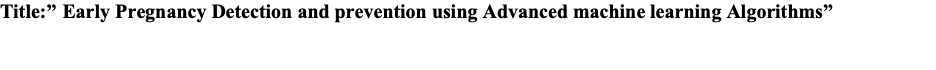

In [41]:
!pip install tensorflow



# Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.layers import Input


# Load and Preprocess the Data

In [43]:


# Load the dataset
data = pd.read_excel('/content/VitaminD.xlsx')


#  Load and Preprocess the Dataset

In [44]:
print(data.columns)


Index(['ID', 'Age', 'Residence ', 'Education Status ', 'Occupation ',
       'Socioeconomic status ', 'BMI', 'Systolic blood Pressure ',
       'Diastolic blood pressure ', 'Gestational age (weeks) ', 'Parity ',
       'Dressing style ', 'Sunlight exposure ', 'Dairy productis consumption ',
       'Multivitamin use ', 'Season ', 'Vitamin D status (ng/mL)',
       'Pregnancy loss'],
      dtype='object')


In [45]:
data.columns = data.columns.str.strip()


In [46]:
print(data.columns)

Index(['ID', 'Age', 'Residence', 'Education Status', 'Occupation',
       'Socioeconomic status', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)', 'Parity',
       'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
       'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)',
       'Pregnancy loss'],
      dtype='object')


In [47]:
data.columns = data.columns.str.strip()


In [48]:
print(data.columns.tolist())


['ID', 'Age', 'Residence', 'Education Status', 'Occupation', 'Socioeconomic status', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure', 'Gestational age (weeks)', 'Parity', 'Dressing style', 'Sunlight exposure', 'Dairy productis consumption', 'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)', 'Pregnancy loss']


In [49]:
# Ensure 'Pregnancy loss' is binary encoded
print(y.unique())  # This should show something like [0, 1]


['Yes' 'No']


In [50]:
# Convert 'Yes'/'No' to 1/0
y = y.map({'Yes': 1, 'No': 0})

# After conversion, check the unique values to ensure it's correctly converted
print(y.unique())  # Should now show [1, 0]


[1 0]


In [51]:
# After encoding but before SMOTE
print(X.dtypes)  # Check data types of all features; all should be numeric (int or float)


ID                                               int64
Age                                              int64
BMI                                            float64
Systolic blood Pressure                        float64
Diastolic blood pressure                       float64
Gestational age (weeks)                          int64
Residence_Rural area                             uint8
Residence_Urban                                  uint8
Education Status_Graduate                        uint8
Education Status_HSC                             uint8
Education Status_Primary                         uint8
Education Status_SSC                             uint8
Occupation_House wife                            uint8
Occupation_Labour                                uint8
Occupation_Service                               uint8
Socioeconomic status_High-income                 uint8
Socioeconomic status_Lower-income                uint8
Socioeconomic status_Lower-middle-income         uint8
Socioecono

In [52]:
# Assuming 'data' is your DataFrame and it includes 'Pregnancy loss' column
data['Pregnancy loss'] = data['Pregnancy loss'].map({'Yes': 1, 'No': 0})




In [53]:
print(data.dtypes)


ID                               int64
Age                              int64
Residence                       object
Education Status                object
Occupation                      object
Socioeconomic status            object
BMI                            float64
Systolic blood Pressure        float64
Diastolic blood pressure       float64
Gestational age (weeks)          int64
Parity                          object
Dressing style                  object
Sunlight exposure               object
Dairy productis consumption     object
Multivitamin use                object
Season                          object
Vitamin D status (ng/mL)        object
Pregnancy loss                   int64
dtype: object


In [54]:
data = pd.get_dummies(data, columns=['Residence', 'Education Status', 'Occupation', 'Socioeconomic status', 'Parity', 'Dressing style', 'Sunlight exposure', 'Dairy productis consumption', 'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)'])


Epoch 1/100
2/2 - 5s - loss: 2.6673 - accuracy: 0.4062 - val_loss: 2.5018 - val_accuracy: 0.5000 - 5s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 2.5040 - accuracy: 0.5156 - val_loss: 2.4718 - val_accuracy: 0.5000 - 39ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 2.5132 - accuracy: 0.5781 - val_loss: 2.4453 - val_accuracy: 0.5625 - 38ms/epoch - 19ms/step
Epoch 4/100
2/2 - 0s - loss: 2.4955 - accuracy: 0.5156 - val_loss: 2.4200 - val_accuracy: 0.6250 - 39ms/epoch - 20ms/step
Epoch 5/100
2/2 - 0s - loss: 2.4769 - accuracy: 0.5625 - val_loss: 2.3966 - val_accuracy: 0.6250 - 41ms/epoch - 20ms/step
Epoch 6/100
2/2 - 0s - loss: 2.4354 - accuracy: 0.5938 - val_loss: 2.3747 - val_accuracy: 0.8125 - 39ms/epoch - 20ms/step
Epoch 7/100
2/2 - 0s - loss: 2.4009 - accuracy: 0.5625 - val_loss: 2.3536 - val_accuracy: 0.8125 - 39ms/epoch - 19ms/step
Epoch 8/100
2/2 - 0s - loss: 2.3976 - accuracy: 0.4531 - val_loss: 2.3326 - val_accuracy: 0.8125 - 39ms/epoch - 19ms/step
Epoch 9/100
2/2 - 0s - loss:

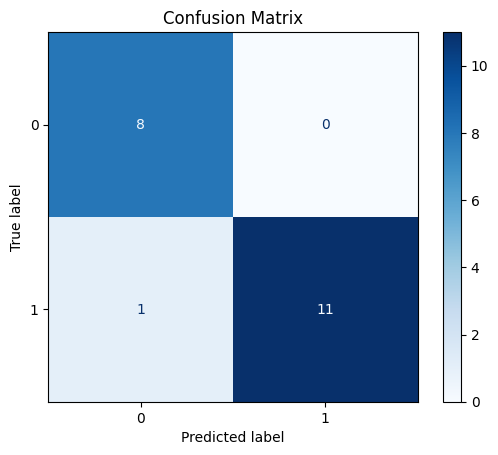

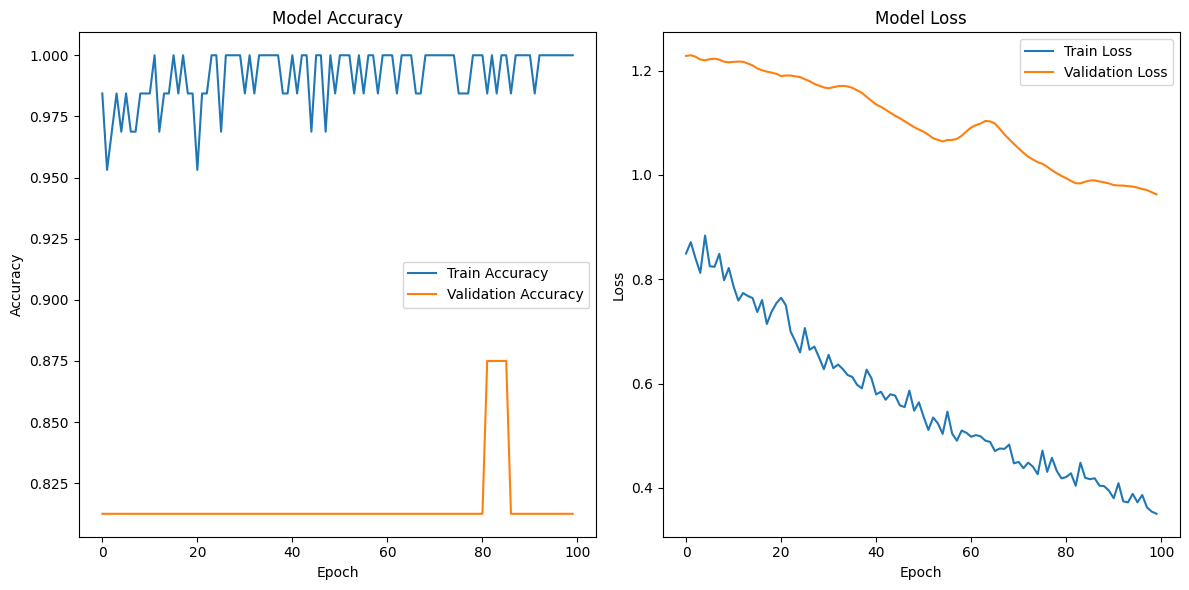

In [55]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2

# Assuming data is now fully numeric and 'Pregnancy loss' is binary encoded

# Scale features
X = data.drop('Pregnancy loss', axis=1)
y = data['Pregnancy loss']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and display metrics
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               4608      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                

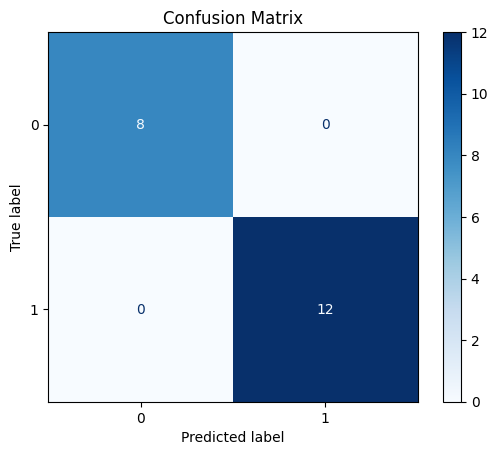

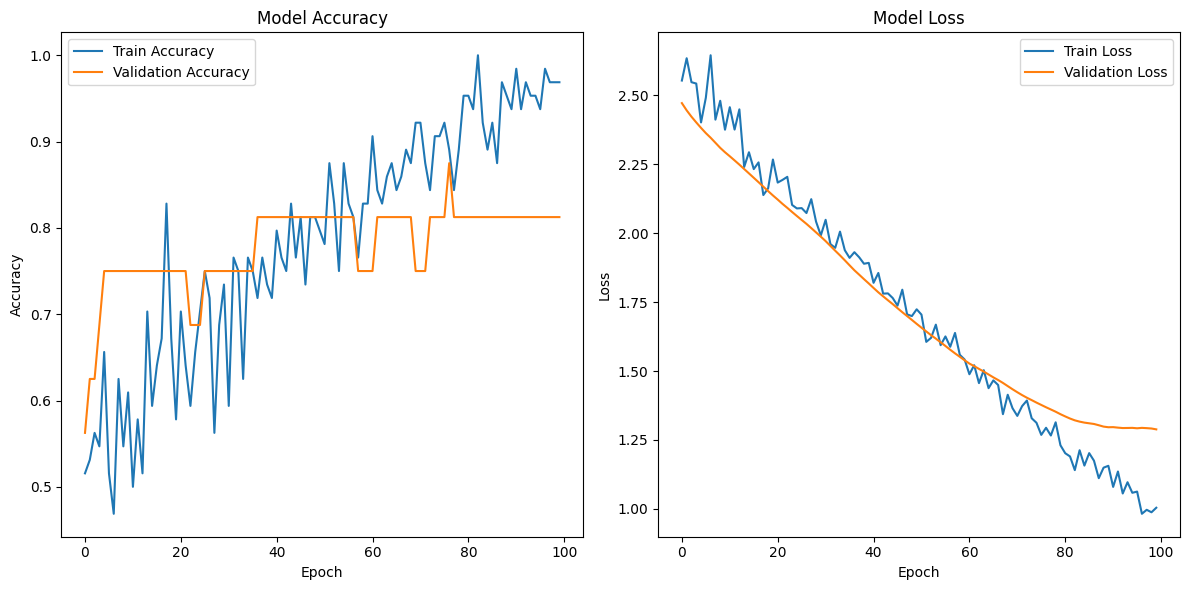

In [56]:
# Model definition
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary to view the architecture
model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
